In [42]:
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
import networkx as nx
import numpy as np
fontSize = 12
def func1(dims,a,b):  
  return a/dims + b 
#import seaborn as sns
from matplotlib.ticker import FormatStrFormatter 

### link prediction and curve fitting

AxesSubplot(0.125,0.536818;0.352273x0.343182)


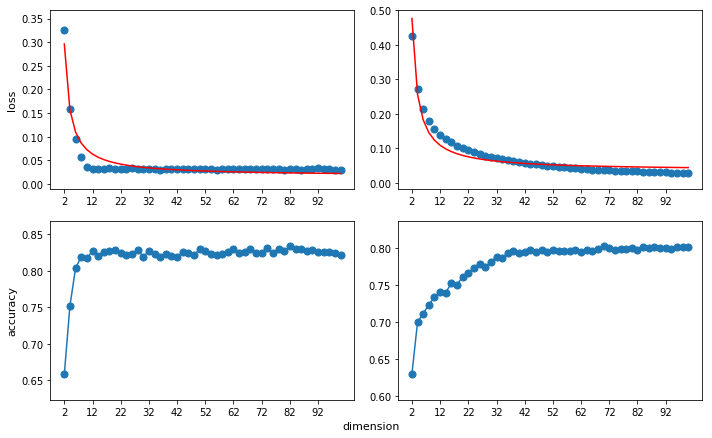

In [184]:
# optimal networks = ['cora','football']
graph = 'football'
sub_dir = 'link_prediction'
f1 = open('./meta_data/{}/{}_walklength_10_nnl.pkl'.format(sub_dir,graph),'rb')
football_loss = pickle.load(f1)
f1.close()

f1 = open('./meta_data/{}/{}_walklength_10_acc.pkl'.format(sub_dir,graph),'rb')
football_accu = pickle.load(f1)
f1.close()

graph = 'cora'
f1 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()

f1 = open('./meta_data/{}/{}_walklength_10_nnl.pkl'.format(sub_dir,graph),'rb')
cora_loss = pickle.load(f1)
f1.close()

f1 = open('./meta_data/{}/{}_walklength_10_acc.pkl'.format(sub_dir,graph),'rb')
cora_accu = pickle.load(f1)
f1.close()

def prediction_plot(dims,walkLengths,losses,accus,graph):  
    fig, axes = plt.subplots(2,2,figsize=(10,6)) 
    print (axes[0,0])
    axes[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axes[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    colors = ['b','y']
    for cnt,loss in enumerate(losses):
        c, cov = optimize.curve_fit(func1, dims,loss)
        fit_values = (func1(np.array(dims),c[0],c[1]))
        bias = abs(np.array(loss)-np.array(loss))
        label = 'walk length: {} Func: y - {:.2f} = {:.2f}/x Error: {:.3f}'.format(walkLengths[cnt],c[1],c[0],np.mean(bias))  
        axes[0,cnt].scatter(dims,loss,label='c',s=50) 
        axes[0,cnt].plot(dims,fit_values,c='r') 
        axes[1,cnt].scatter(dims,accus[cnt],s=50) 
        axes[1,cnt].plot(dims,accus[cnt]) 
        axes[0,cnt].set_xticks(range(dims[0],dims[-1],10))
        axes[1,cnt].set_xticks(range(dims[0],dims[-1],10))
        if cnt == 0:
            axes[0,cnt].set_ylabel('loss',fontsize=fontSize)
            axes[1,cnt].set_ylabel('accuracy',fontsize=fontSize)
   
#     plt.suplabel('NEL and link prediction accuracy of {} network'.format(graph))  
    fig.text(0.52, 0.004, 'dimension', va='center', ha='center',fontsize=fontSize)
    plt.savefig('./meta_data/{}/{}_prediction.eps'.format(sub_dir,graph),format='eps',dpi=3000)
    plt.tight_layout()
    plt.show()

end_index = 50
dims = dims[:end_index]
football_loss = football_loss[:end_index]
football_accu = football_accu[:end_index]
cora_loss = cora_loss[:end_index]
cora_accu = cora_accu[:end_index]

prediction_plot(dims,[10,10],[football_loss,cora_loss],[football_accu,cora_accu],['football','cora'])

### community detection and curve fitting

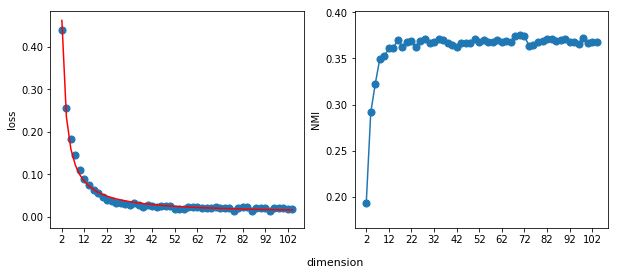

In [157]:
# optimal networks = ['SBM_256_blocks_16']
graph = 'SBM_256_blocks_16'
sub_dir = 'community_detection'
f2 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f2)
f2.close()
f1 = open('./meta_data/{}/{}_nnl.pkl'.format(sub_dir,graph),'rb')
nnl = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_acc.pkl'.format(sub_dir,graph),'rb')
nmis = pickle.load(f1)
f1.close()

def clustering_plot(dims,nnl,nmis,graph):   
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4)) 
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    c, cov = optimize.curve_fit(func1, dims,nnl)
    fit_values = (func1(np.array(dims),c[0],c[1]))
    bias = abs(np.array(nnl)-np.array(fit_values))
    label = 'Func: y - {:.2f} = {:.2f}/x Error: {:.3f}'.format(c[1],c[0],np.mean(bias))
    ax1.scatter(dims,nnl,s=50) 
    ax1.plot(dims,func1(np.array(dims),c[0],c[1]),label=label,color='r') 
    #    ax1.legend()
    ax2.scatter(dims,nmis,s=50) 
    ax2.plot(dims,nmis) 

    ax1.set_xticks(range(dims[0],dims[-1],10))
    ax2.set_xticks(range(dims[0],dims[-1],10))  
    ax1.set_ylabel('loss')
    #    ax2.set_xlabel('dimension',fontsize=fontSize)  
    ax2.set_ylabel('NMI')    
    fig.text(0.52, 0.004, 'dimension', va='center', ha='center',fontsize=fontSize)
    plt.savefig('./meta_data/{}/{}_clustering.eps'.format(sub_dir,graph),format='eps',dpi=3000)
    plt.show()
end = 52
dims = dims[:end]
nnl = nnl[:end]
nmis = nmis[:end]
clustering_plot(dims,nnl,nmis,graph)

### network size and density

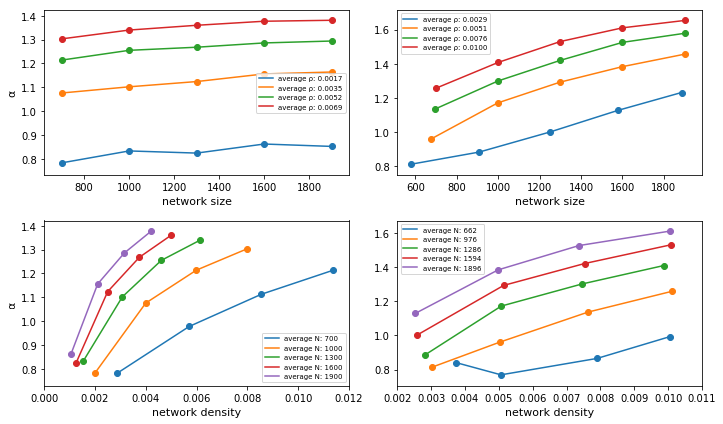

In [181]:
graph = 'BA'
sub_dir = 'size_density'
fontSize = 11
legendSize = 7
nodes_list =  range(400,2000,300)[1:]
nodes_density = [i*0.0005 for i in range(5,21,5)]

density_list = []; node_list = []
for density in nodes_density:
    for node in nodes_list:    
      G = nx. read_edgelist('./meta_data/{}/graph/{}_node_{}_density_{}'.format(sub_dir,graph,node,density))
      density_list.append(nx.density(G))
      node_list.append(len(G.nodes()))
density_matrix = np.array(density_list).reshape(len(nodes_density),-1)
node_matrix = np.array(node_list).reshape(len(nodes_density),-1)
b_matrixs =  np.load('./meta_data/{}/{}_para_0_matrixs.npy'.format(sub_dir,graph))


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,6))
for index,i in enumerate(nodes_density): 

    ax1.scatter(node_matrix[index,:],b_matrixs[0,index,:][1:])
    ax1.plot(node_matrix[index,:],b_matrixs[0,index,:][1:],label='average \u03C1: {:.4f}'.format(np.mean(density_matrix[index,:])))
    ax1.set_xlabel('network size',fontsize = fontSize)
    ax1.set_ylabel('\u03B1',fontsize = fontSize)
    ax1.legend(fontsize=legendSize) 

for index,i in enumerate(nodes_list):
    ax3.scatter(density_matrix[:,index],b_matrixs[0,:,index])
    ax3.plot(density_matrix[:,index],b_matrixs[0,:,index],label='average N: {:d}'.format(int(np.mean(node_matrix[:,index]))))
    ax3.set_xlabel('network density',fontsize = fontSize)
    ax3.set_ylabel('\u03B1',fontsize = fontSize)
    ax3.legend(fontsize=legendSize)
    ax3.set_xlim(0.000,0.012)
    
graph = 'ER'
density_list = []; node_list = []
for density in nodes_density:
    for node in nodes_list:    
      G = nx. read_edgelist('./meta_data/{}/graph/{}_node_{}_density_{}'.format(sub_dir,graph,node,density))
      density_list.append(nx.density(G))
      node_list.append(len(G.nodes()))
density_matrix = np.array(density_list).reshape(len(nodes_density),-1)
node_matrix = np.array(node_list).reshape(len(nodes_density),-1)
b_matrixs =  np.load('./meta_data/{}/{}_para_0_matrixs.npy'.format(sub_dir,graph))
for index,i in enumerate(nodes_density): 

    ax2.scatter(node_matrix[index,:],b_matrixs[0,index,:][1:])
    ax2.plot(node_matrix[index,:],b_matrixs[0,index,:][1:],label='average \u03C1: {:.4f}'.format(np.mean(density_matrix[index,:])))
    ax2.set_xlabel('network size',fontsize = fontSize)
#     ax2.set_ylabel('\u03B1',fontsize = fontSize)
    ax2.legend(fontsize=legendSize) 

for index,i in enumerate(nodes_list):
    ax4.scatter(density_matrix[:,index],b_matrixs[0,:,index])
    ax4.plot(density_matrix[:,index],b_matrixs[0,:,index],label='average N: {:d}'.format(int(np.mean(node_matrix[:,index]))))
    ax4.set_xlabel('network density',fontsize = fontSize)
#     ax4.set_ylabel('\u03B1',fontsize = fontSize)
    ax4.legend(fontsize=legendSize)
    ax4.set_xlim(0.002,0.011)
plt.tight_layout()
plt.savefig('./meta_data/{}/density_size.eps'.format(sub_dir),format='eps',dpi=5000)  
plt.show()

### variance

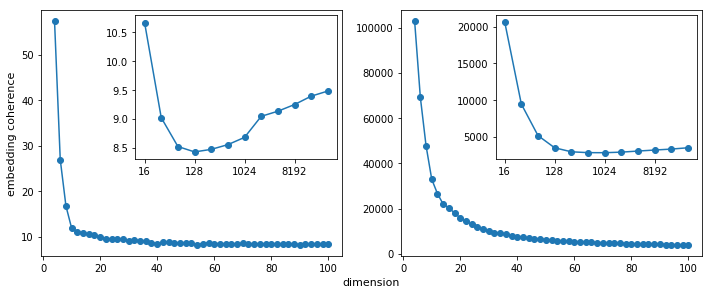

In [170]:
# optimal networks = ['cora','football']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
graph = 'football'
sub_dir = 'variance'
f1 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_variance.pkl'.format(sub_dir,graph),'rb')
variance = pickle.load(f1)
f1.close()

dims_base = [2**i for i in range(4,16,1)]
f1 = open('./meta_data/{}/{}_variance_base2.pkl'.format(sub_dir,graph),'rb')
variance_base = pickle.load(f1)
f1.close()

dims = dims[1:]
variance = variance[1:]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4)) 
ax1.scatter(dims,variance) 
ax1.plot(dims,variance)
ax1.set_ylabel('embedding coherence',fontsize = fontSize)
# ax1.set_xlabel('embedding dimensions',fontsize = fontSize)      
# plt.title('coherence measuring of {} network'.format(graph),fontsize = 13)  
axins = inset_axes(ax1, width=2.8, height=2)
axins.scatter(dims_base,variance_base)
axins.plot(dims_base,variance_base)
axins.set_xscale('log', basex=2) 
axins.set_xticks([dims_base[i] for i in range(len(dims_base)) if divmod(i,3)[1] == 0])
axins.set_xticklabels([dims_base[i] for i in range(len(dims_base)) if divmod(i,3)[1] == 0])

graph = 'Cora'
sub_dir = 'variance'
f1 = open('./meta_data/{}/{}_dim.pkl'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_variance.pkl'.format(sub_dir,graph),'rb')
variance = pickle.load(f1)
f1.close()
dims_base = [2**i for i in range(4,16,1)]
f1 = open('./meta_data/{}/{}_variance_base2.pkl'.format(sub_dir,graph),'rb')
variance_base = pickle.load(f1)
f1.close()

dims = dims[1:]
variance = variance[1:]
ax2.scatter(dims,variance) 
ax2.plot(dims,variance)    
# plt.title('coherence measuring of {} network'.format(graph),fontsize = 13)  
axins = inset_axes(ax2, width=2.8, height=2)
axins.scatter(dims_base,variance_base)
axins.plot(dims_base,variance_base)
axins.set_xscale('log', basex=2) 
axins.set_xticks([dims_base[i] for i in range(len(dims_base)) if divmod(i,3)[1] == 0])
axins.set_xticklabels([dims_base[i] for i in range(len(dims_base)) if divmod(i,3)[1] == 0])
fig.text(0.52, 0.004, 'dimension', va='center', ha='center',fontsize=fontSize)
plt.tight_layout()
plt.show()


# variance_plot(dims,variance,dims_base,variance_base,graph)

### LINE and node2vec

Text(0.52, 0.004, 'dimension')

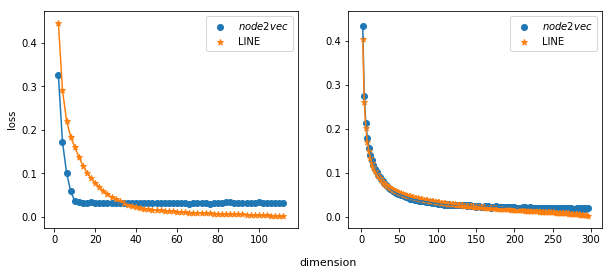

In [177]:
# optimal networks = ['citeseer','football','Cora']
plt.close()
graph = 'football'
sub_dir = 'line'
f1 = open('./meta_data/{}/{}_dim_compare'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_line_compare'.format(sub_dir,graph),'rb')
line_norms = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_node2vec_compare'.format(sub_dir,graph),'rb')
node2vec_norms = pickle.load(f1)
f1.close()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4)) 
ax1.scatter(dims,node2vec_norms,label='$node2vec$',marker='o') 
ax1.plot(dims,node2vec_norms) 
ax1.scatter(dims,line_norms,label='LINE',marker='*')
ax1.plot(dims,line_norms)
ax1.legend()           
ax1.set_ylabel('loss',fontsize = 10)
# ax1.set_xlabel('embedding dimensions',fontsize = 10)             
# plt.title('embedding comparation of {} network'.format(graph),fontsize = 15) 
graph = 'Cora'
sub_dir = 'line'
f1 = open('./meta_data/{}/{}_dim_compare'.format(sub_dir,graph),'rb')
dims = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_line_compare'.format(sub_dir,graph),'rb')
line_norms = pickle.load(f1)
f1.close()
f1 = open('./meta_data/{}/{}_node2vec_compare'.format(sub_dir,graph),'rb')
node2vec_norms = pickle.load(f1)
f1.close()

ax2.scatter(dims,node2vec_norms,label='$node2vec$',marker='o') 
ax2.plot(dims,node2vec_norms) 
ax2.scatter(dims,line_norms,label='LINE',marker='*')
ax2.plot(dims,line_norms)
ax2.legend()           
fig.text(0.52, 0.004, 'dimension', va='center', ha='center',fontsize=fontSize)

### PPI loss